## Packages & Modules

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter


## Inputs

In [2]:
username = 'niallwhelan'
file_dir = '/Users/nw/Documents/projects/chess_project/chess_files'
input_file = 'Game Data.csv'

game_type = 'chess_blitz'
game_time_sec = 600

In [3]:
# Set aesthetic parameters in one step.
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=1.2,
        color_codes=True,
        rc=None,)

## Data Inputs

In [4]:
from chess_data_extraction import extract
raw_game_data = extract(username, file_dir)

In [5]:
from chess_data_preparation import prepare
game_data = prepare(raw_game_data)

Missing Data (Usually API Issue) - Dropped 5 Rows


## Data Preparation

In [6]:
## Create dataframe with all dates in period
from datetime import datetime
min_date = min(game_data['game_date'])
max_date = max(game_data['game_date'])
date_df = pd.DataFrame(pd.date_range(min_date,max_date))
date_df.columns = ['Date']
date_df['Date'] = date_df['Date'].dt.date

## Preparation - Trends

In [7]:
## Create Game Trend Data Frame
trds_gms_plyd = game_data['game_date'].value_counts().sort_index(ascending=True)
trds_gms_plyd = pd.DataFrame(trds_gms_plyd)
trds_gms_plyd = trds_gms_plyd.reset_index()
trds_gms_plyd.columns = ['Date','Games']

trds_gms_plyd = date_df.merge(trds_gms_plyd, 
                              how = 'left',
                              on = 'Date')

trds_gms_plyd = trds_gms_plyd.fillna(0)

## Visualisation Functions

In [69]:
## Simple Trend Graph
def simple_date_trend(x,y,data,title):
    ## Set up figure and axis - define plot size
    fig, ax = plt.subplots(figsize=(20, 10));

    ## Plot Variables
    ax = sns.lineplot(x=x ,y = y, 
                       data=data);
    ## Chart Title 
    ax.set_title(title, fontsize=25) ;

    ## Set Axis info
    ax.set(xticks = trds_gms_plyd[x].values,
           xticklabels = trds_gms_plyd[x].values, ## Need to set as xticks converts to a int value
           xlabel=x,
           ylabel=y);

    ## Rotate Labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
    
## Cumulative Trend Graphs
def non_date_trend(x,y,title,x_label,y_label, legend, set_to_zero = True):
    fig, ax = plt.subplots(figsize=(20, 10));

    ## Plot Wins & Non-Wins
    if type(x) == list:
        for i in range(len(x)):
            ax = sns.lineplot(x=x[i] ,y = y[i]);
    else:
        ax = sns.lineplot(x=x ,y = y);
            
     ## Chart Title 
    ax.set_title(title, fontsize=25) ;

    ax.set(xlabel = x_label,
           ylabel = x_label);
    if set_to_zero == True:
        ax.set_xbound(lower=0);
        ax.set_ybound(lower=0);
    
    if type(x) == list:
        ax.legend(legend);

## Visualisation - Trends

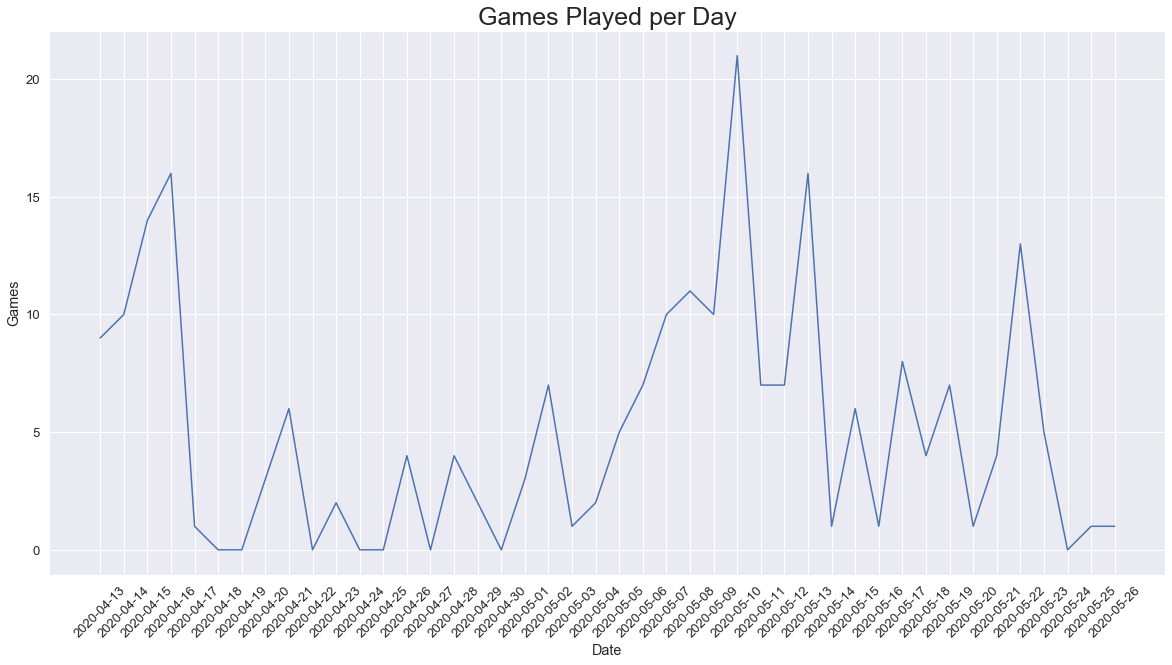

In [9]:
## Games Played per Day
simple_date_trend('Date','Games', trds_gms_plyd, 'Games Played per Day')

## Visualisation - Cumulative Results

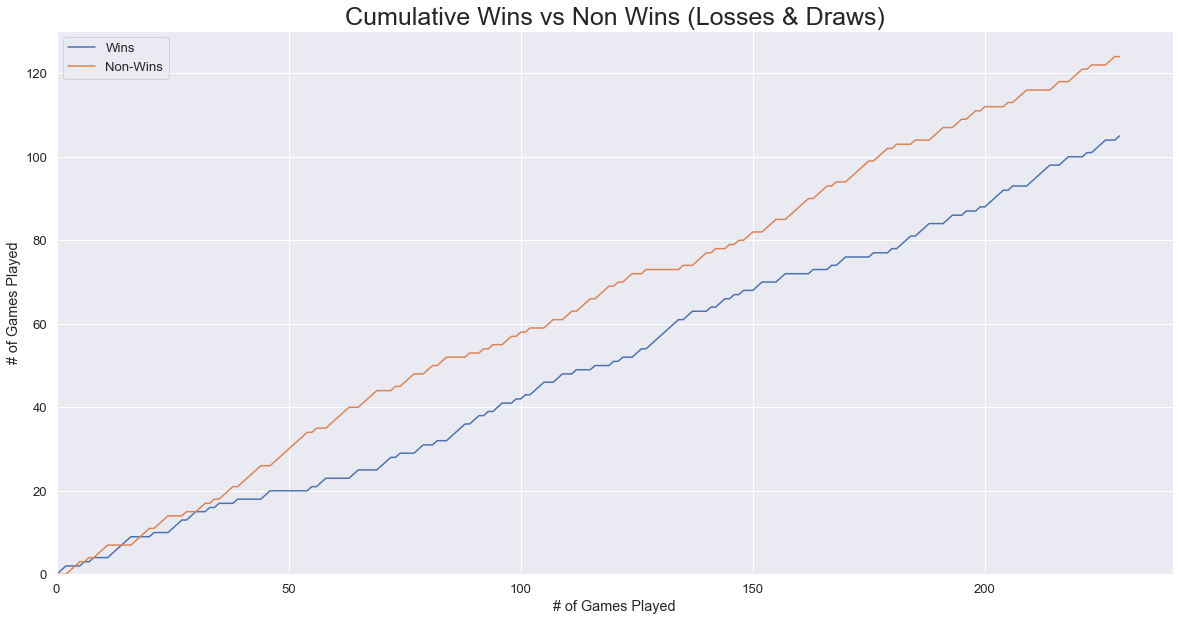

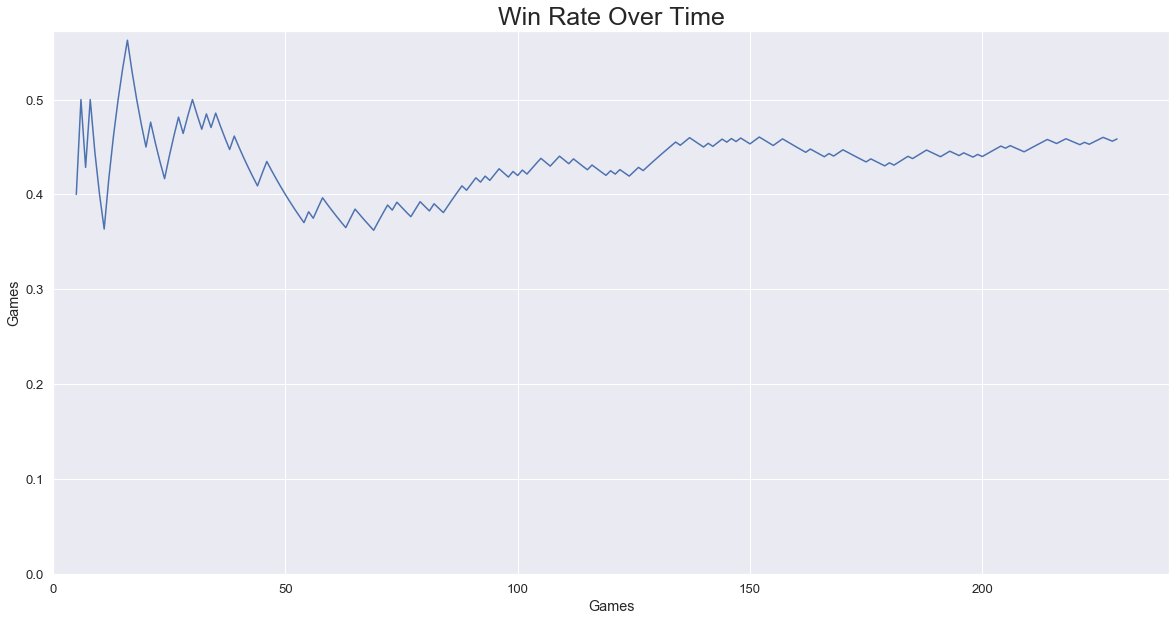

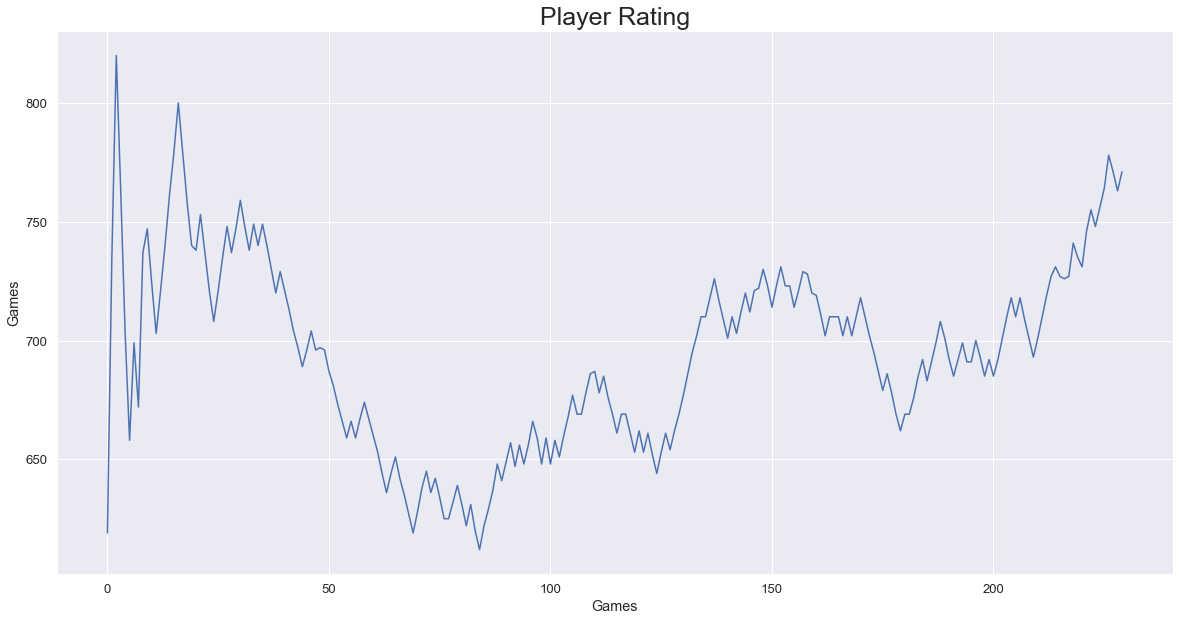

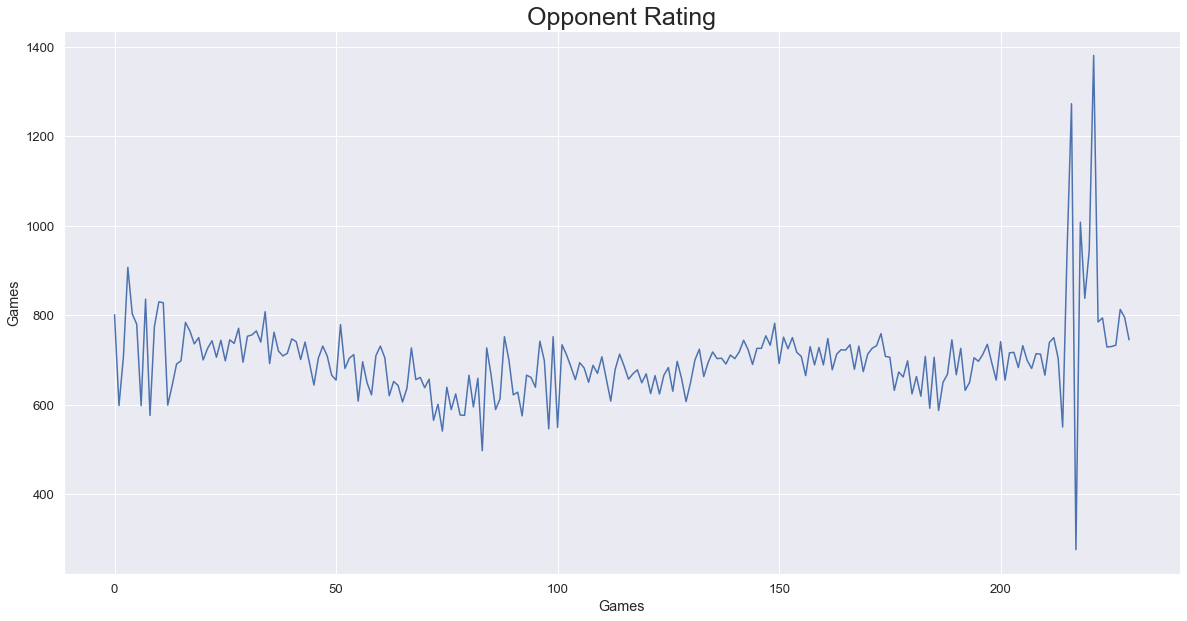

In [70]:
## Wins Vs Non Wins
non_date_trend(x = [game_data['cum_games_played'], game_data['cum_games_played']],
                 y = [game_data['cum_wins'],game_data['cum_non_wins']] ,
                 title = 'Cumulative Wins vs Non Wins (Losses & Draws)',
                 x_label = '# of Games Played',
                 y_label = 'Wins & Non-Wins',
                legend = ['Wins','Non-Wins']);


non_date_trend(x=game_data['cum_games_played'][5:],
                y = (game_data['cum_wins'] / game_data['cum_games_played'])[5:],
                title = 'Win Rate Over Time',
                 x_label = 'Games',
                 y_label = '% Wins',
                legend = ['% Win Rate']);

non_date_trend(x=game_data['cum_games_played'].astype(float),
                y = game_data['player_rating_post'].astype(float),
                title = 'Player Rating',
                 x_label = 'Games',
                 y_label = 'Player Rating',
                legend = [],
                set_to_zero = False);

non_date_trend(x=game_data['cum_games_played'].astype(float),
                y = game_data['opponent_rating_post'].astype(float),
                title = 'Opponent Rating',
                 x_label = 'Games',
                 y_label = 'Opponent Rating Rating',
                legend = [],
                set_to_zero = False);

## Visualisation - Categorical Variables

In [30]:
#from visualisation_functions import plot_frequency
plot_frequency(game_data['result_binary'])
plot_frequency(game_data['result'])

plot_frequency(game_data['opponent_country'])

plot_frequency(game_data['game_time_hour'])



## Visualisation - Numeric Variables

In [76]:
#from visualisation_functions import plotHistogram
plotHistogram(game_data['opponent_rating_post'])

plotHistogram(game_data['opponant_tsj'])